In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy


Cargo datasets de train, test, y las clases fine (100) y coarse (20).

Divido por 255 para normalizar el RGB a algo entre 0.0 y 1.0

In [3]:
x_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")
x_test = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy")
y_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy")

In [6]:
import pickle
with open("/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)

In [5]:
indices_train = np.arange(len(x_train))
np.random.shuffle(indices_train)

x_train = x_train[indices_train]
y_train = y_train[indices_train]

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
%matplotlib inline

## preprocessing & augmentation

In [8]:
from imgaug import augmenters as iaa
import imgaug as ia
from keras.utils import to_categorical
import random

np.bool = np.bool_

2024-06-20 03:28:23.832209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 03:28:23.832332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 03:28:23.989938: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


> 

In [9]:
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# train_labels = to_categorical(y_train)
train_labels = y_train

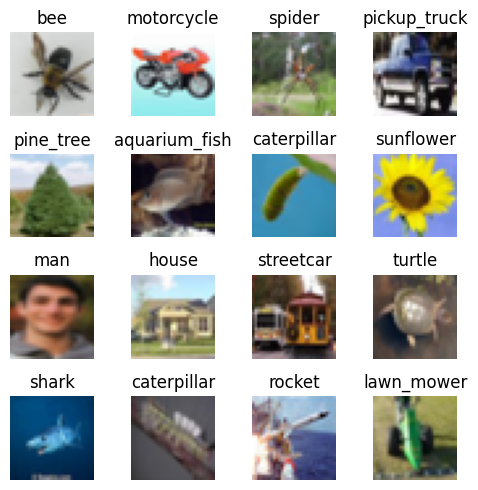

In [10]:
plt.figure(figsize=(5, 5))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(train_images[rand_num])
  plt.title(labels_fine[train_labels[rand_num]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
seq = iaa.Sequential([ 
    iaa.Fliplr(1.0), #horizontal mirror, p=1
    iaa.Affine(rotate=(-25,25)), # random degree

    iaa.SomeOf((2, 5),
        [
            iaa.Affine(translate_px={"x": (-5, 5)}),
            iaa.Affine(translate_px={"y": (-5, 5)}),
            iaa.Affine(shear=(-2, 2),mode = ['symmetric','wrap']),#48
            iaa.Affine(scale={"x": (0.90, 1.10), "y": (0.90, 1.10)}),

            iaa.CropAndPad(px=(-2, 2),sample_independently=True,pad_mode=["constant", "edge"]),
    
            iaa.Add((-0.15, 0.15), per_channel=0.5),
            iaa.Multiply((0.95, 1.15), per_channel=0.5),

            iaa.LinearContrast((0.8, 1.4)),
            iaa.Cutout(fill_mode="gaussian", nb_iterations=(1, 4), size=0.10),
        ],random_order=True)
],random_order=True)

In [11]:
aug_test = seq.augment_images(images=train_images[:1000])

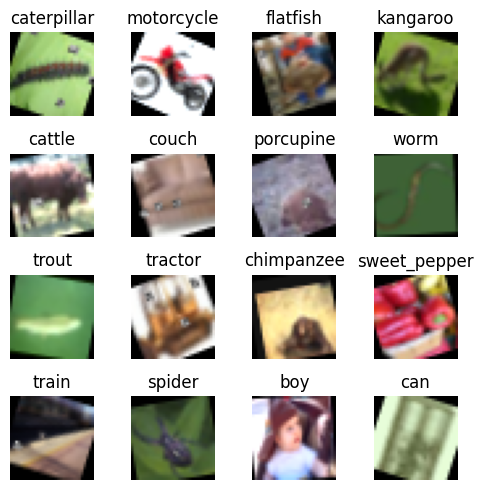

In [12]:
plt.figure(figsize=(5, 5))
for i in range (16):
  rand_num = np.random.randint(0, 1000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(aug_test[rand_num])
  plt.title(labels_fine[train_labels[rand_num]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_images_aug1 = seq.augment_images(train_images)
train_images_aug2 = seq.augment_images(train_images)
train_images_aug3 = seq.augment_images(train_images)
train_images_aug4 = seq.augment_images(train_images)

In [ ]:
# train_images_aug2 = seq.augment_images(train_images)

In [ ]:
# train_images_aug3 = seq.augment_images(train_images)

In [ ]:
train_images_aug_all = []
train_images_aug_all.extend(train_images)
train_images_aug_all.extend(train_images_aug1)
train_images_aug_all.extend(train_images_aug2)
train_images_aug_all.extend(train_images_aug3)
train_images_aug_all.extend(train_images_aug4)

In [ ]:
train_labels_aug_all = []
train_labels_aug_all.extend(train_labels)
train_labels_aug_all.extend(train_labels)
train_labels_aug_all.extend(train_labels)
train_labels_aug_all.extend(train_labels)
train_labels_aug_all.extend(train_labels)

In [ ]:
print(len(train_images_aug_all))
print(len(train_labels_aug_all))

In [11]:
train_images_final = []
train_labels_final = []

In [ ]:
# train_images_final = train_images
# train_labels_final = train_labels

In [ ]:
train_images_final = train_images_aug_all
train_labels_final = train_labels_aug_all

combined = list(zip(train_images_aug_all, train_labels_aug_all))
random.shuffle(combined)

train_images_final[:], train_labels_final[:] = zip(*combined)

In [ ]:
train_images_final = np.asarray(train_images_final)
train_labels_final = np.asarray(train_labels_final)

In [12]:
# with open('train_images_final.pkl', 'wb') as f:
#     pickle.dump(train_images_final, f)

# with open('train_labels_final.pkl', 'wb') as f:
#     pickle.dump(train_labels_final, f)
    
    
    
with open('train_images_final.pkl', 'rb') as f:
    train_images_final = pickle.load(f)

with open('train_labels_final.pkl', 'rb') as f:
    train_labels_final = pickle.load(f)

In [13]:
print(train_images_final.shape)
print(train_labels_final.shape)

(250000, 32, 32, 3)
(250000,)


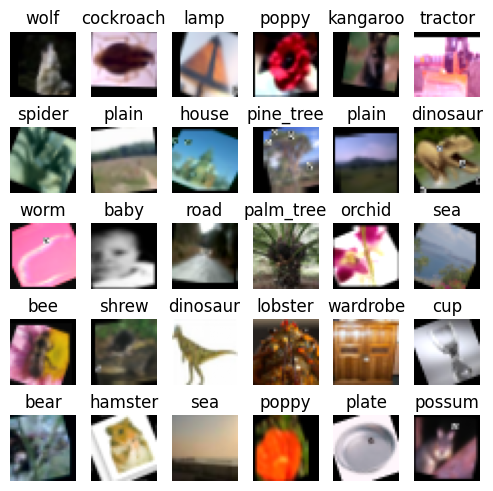

In [14]:
plt.figure(figsize=(5, 5))
for i in range(30):
    rand_num = np.random.randint(0, 250000)
    cifar_img = plt.subplot(5, 6, i + 1)
    plt.imshow(train_images_final[rand_num])
 
    plt.title(labels_fine[train_labels_final[rand_num]]) 
    plt.axis('off')

plt.tight_layout()
plt.show()

## CNNModel

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import collections

from tensorflow.keras import Model, mixed_precision

[SAM, Sharpness-Aware Minimization (PyTorch)](https://github.com/davda54/sam/blob/main/sam.py)

In [147]:
# Definir la función de entrenamiento SAM
def train_step_sam(model, data, rho=0.05):
    x, y = data
    sample_weight = None

    # Primera pasada hacia adelante y cálculo de gradientes
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True)
        loss = model.compute_loss(x, y, y_pred, sample_weight)
    trainable_vars = model.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)

    # Primer paso SAM: mover a la vecindad adversarial
    eps_w_ls = []
    grad_norm = tf.linalg.global_norm(gradients)
    for i in range(len(trainable_vars)):
        eps_w = tf.math.multiply(gradients[i], rho / (grad_norm + 1e-12))
        trainable_vars[i].assign_add(eps_w)
        eps_w_ls.append(eps_w)

    # Segunda pasada hacia adelante y cálculo de gradientes en el punto adversarial
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True)
        loss = model.compute_loss(x, y, y_pred, sample_weight)
    gradients = tape.gradient(loss, trainable_vars)

    # Segundo paso SAM: actualizar los parámetros
    for i in range(len(trainable_vars)):
        trainable_vars[i].assign_sub(eps_w_ls[i])
    model.optimizer.apply_gradients(zip(gradients, trainable_vars))

    # Actualizar métricas
    for metric in model.metrics:
        metric.update_state(y, y_pred)
    return {m.name: m.result() for m in model.metrics}

# Definir la clase de modelo personalizado
class CustomModel(tf.keras.Model):
    def __init__(self, base_model):
        super(CustomModel, self).__init__()
        self.base_model = base_model

    def call(self, inputs, training=False):
        return self.base_model(inputs, training=training)

    def train_step(self, data):
        return train_step_sam(self, data, rho=0.05)

In [16]:
base_model = Sequential()

base_model.add(Conv2D(64, (3, 3), padding='same', activation='swish', input_shape=(32, 32, 3)))
base_model.add(BatchNormalization())
base_model.add(Conv2D(64, (3, 3), padding='same', activation='swish'))
base_model.add(BatchNormalization())

base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Dropout(0.2))

base_model.add(Conv2D(128, (3, 3), padding='same', activation='swish'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(128, (3, 3), padding='same', activation='swish'))
base_model.add(BatchNormalization())

base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Dropout(0.3))

base_model.add(Conv2D(256, (3, 3), padding='same', activation='swish'))
base_model.add(BatchNormalization())
base_model.add(Conv2D(256, (3, 3), padding='same', activation='swish'))
base_model.add(BatchNormalization())

base_model.add(MaxPooling2D(pool_size=(2, 2)))
base_model.add(Dropout(0.4))

base_model.add(Flatten())
base_model.add(Dense(1024, activation='swish'))
base_model.add(Dropout(0.5))
base_model.add(Dense(512, activation='swish'))
base_model.add(Dropout(0.5))
base_model.add(Dense(100, activation='softmax'))

base_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,80

 Total params: 5,920,420 (22.58 MB)

 Trainable params: 5,918,628 (22.58 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [17]:
num_epochs = 200
batch_size = 512
base_lr = 0.001

In [20]:
base_optimizer = Adam(learning_rate=base_lr)

In [18]:
# model = CustomModel(base_model)
model = base_model

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=base_optimizer,
              metrics=['accuracy'])

In [22]:
rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5,
    min_delta=0.001,
)

In [23]:
mc = ModelCheckpoint(
#     ".weights.h5",
    filepath='/kaggle/working/best_model.keras',
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True
#     save_weights_only = True,
)

In [24]:
es = EarlyStopping(
    monitor = "val_accuracy",
    min_delta=0.001,
    patience = 7, 
    verbose = 1,
    restore_best_weights = True,
)

In [25]:
train_labels_final_tweak = to_categorical(train_labels_final)
print(train_labels_final_tweak.shape)
print(train_images_final.shape)

(250000, 100)
(250000, 32, 32, 3)


In [26]:
history = model.fit(x=train_images_final,
                    y=train_labels_final_tweak,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_split=0.2,
                    callbacks=[rlrop, es, mc])

Epoch 1/200
  1/391 ━━━━━━━━━━━━━━━━━━━━ 3:38:37 34s/step - accuracy: 0.0117 - loss: 9.0056

I0000 00:00:1718854254.542711     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718854254.567087     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.0540 - loss: 4.4568

W0000 00:00:1718854318.877242     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718854321.649708     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.02458, saving model to /kaggle/working/best_model.keras


W0000 00:00:1718854330.871098     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 196ms/step - accuracy: 0.0541 - loss: 4.4557 - val_accuracy: 0.0246 - val_loss: 4.8791 - learning_rate: 0.0010
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.1868 - loss: 3.3662
Epoch 2: val_accuracy improved from 0.02458 to 0.14022, saving model to /kaggle/working/best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.1868 - loss: 3.3658 - val_accuracy: 0.1402 - val_loss: 3.9191 - learning_rate: 0.0010
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2956 - loss: 2.7806
Epoch 3: val_accuracy improved from 0.14022 to 0.36126, saving model to /kaggle/working/best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - accuracy: 0.2957 - loss: 2.7804 - val_accuracy: 0.3613 - val_loss: 2.4736 - learning_rate: 0.0010
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3735 - loss: 2.3851
Epoch 4: val_accuracy improved from 0.36126 to 0.44960, saving model to /kaggle/working/be

In [ ]:
# model.load_weights('/kaggle/working/best_model.keras')

In [27]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [29]:
all_history = collections.defaultdict(dict)

In [30]:
all_history['case_1_train'] = history.history

In [31]:
print('Train loss:', all_history['case_1_train']['loss'][-1])
print('Train acc:', all_history['case_1_train']['accuracy'][-1])
print('Validation loss:', all_history['case_1_train']['val_loss'][-1])
print('Validation acc:', all_history['case_1_train']['val_accuracy'][-1])

Train loss: 0.9186187386512756
Train acc: 0.7256900072097778
Validation loss: 0.9399884343147278
Validation acc: 0.7275400161743164


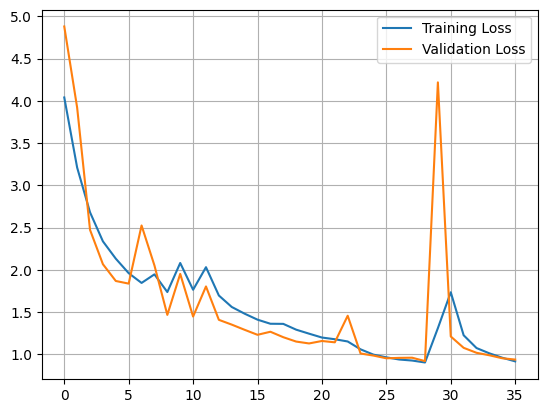

In [32]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid()
plt.legend()

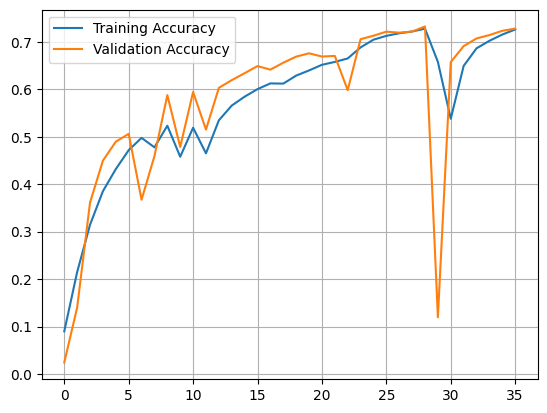

In [33]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid()
plt.legend()

In [34]:
test_images_aux = test_images

In [35]:
predictions = model.predict(test_images_aux).argmax(axis=1)

 58/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

W0000 00:00:1718856125.705849     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


W0000 00:00:1718856128.000718     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [36]:
print(predictions.shape)
print(predictions[1])

(10000,)
33


Some predictions:


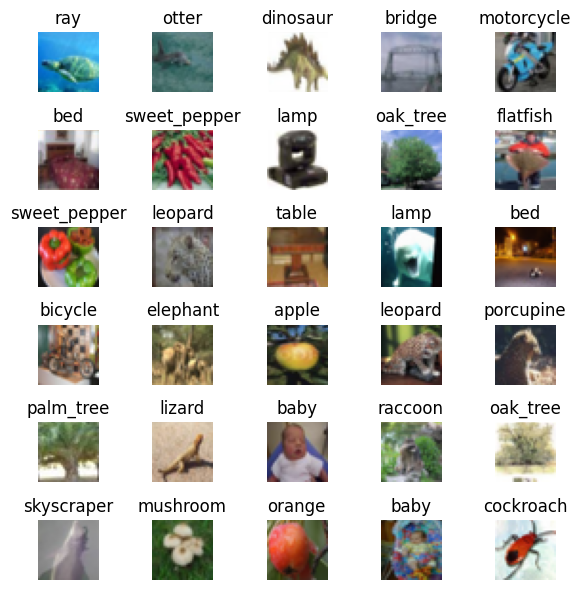

In [37]:
print("Some predictions:")

plt.figure(figsize=(6, 6))
for i in range (30):
  rand_num = np.random.randint(0, 10000)
  cifar_img = plt.subplot(6,5, i+1)
  plt.imshow(test_images_aux[rand_num])
  plt.title(labels_fine[predictions[rand_num]])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
df = pd.DataFrame(predictions, columns=["Label"])
df.index.name = "Id"
df.head()
df.to_csv("submission.csv")